# Time Series Project (Facebook Popularity Analysis)

Data source: https://www.kaggle.com/datasets/michau96/social-media-popularity-2009-2023

### Abstract

In this project, Facebook popularity between 2009 and 2023 on in a monthly basis is studied.

Three approaches have been followed, using auto.arima() from forecast library, extracting p and q from ACF and PACF of the first difference of data, and using BIC and AIC. Model diagnosis is made for each model to see to what extent the residuals form a white noise for more accurate result

Then a small forecasting is done with a comparaison of RMSE score between all model

### Introduction:

Nowadays, we cannot hide the influence social media made on humans life. Their influence reached an extent it can affect counties politics (like what's happening in Gaza's war now)

So this study aims to see the popularity of the most famous social media - Facebook -

### Data Preprocessing

In [222]:
df = read.csv("/content/social_media.csv")

summary(df)

     Date              Facebook       Pinterest        Twitter      
 Length:177         Min.   :20.16   Min.   : 0.00   Min.   : 2.780  
 Class :character   1st Qu.:64.79   1st Qu.: 5.24   1st Qu.: 5.540  
 Mode  :character   Median :68.95   Median : 7.33   Median : 6.850  
                    Mean   :69.60   Mean   : 7.35   Mean   : 7.308  
                    3rd Qu.:75.54   3rd Qu.:10.70   3rd Qu.: 8.750  
                    Max.   :87.83   Max.   :16.96   Max.   :15.480  
  StumbleUpon        YouTube         Instagram          Tumblr       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.0000  
 1st Qu.: 0.010   1st Qu.: 1.540   1st Qu.: 0.000   1st Qu.: 0.0000  
 Median : 0.390   Median : 3.860   Median : 0.000   Median : 0.4200  
 Mean   : 5.206   Mean   : 3.789   Mean   : 2.191   Mean   : 0.9846  
 3rd Qu.: 5.820   3rd Qu.: 5.060   3rd Qu.: 2.410   3rd Qu.: 1.0100  
 Max.   :36.790   Max.   :11.040   Max.   :14.320   Max.   :10.2500  
     reddit         VKontak

In [223]:
keeps <- df[,c("Date", "Facebook")]

df <- keeps

In [224]:
head(df)

,Date,Facebook
,<chr>,<dbl>
1,2009-04,20.16
2,2009-05,24.30
3,2009-06,26.48
4,2009-07,29.10
5,2009-08,34.25
6,2009-09,39.89


In [225]:
# Install the zoo package
install.packages("zoo")

# Load the zoo package
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [226]:
# Convert "Date" column to Date object using zoo's as.yearmon function
df$Date <- as.yearmon(df$Date)

# Create time series object
ts_data <- zoo(df$Facebook, order.by = df$Date)

ts_data <- as.ts(as.numeric(ts_data))

In [227]:
length(ts_data)

[1] 177

In [228]:
# Separate Data
train_size <- 170
train_data <- ts_data[1:train_size]
test_data <- ts_data[(train_size + 1):length(ts_data)]

### Variance Stabilization

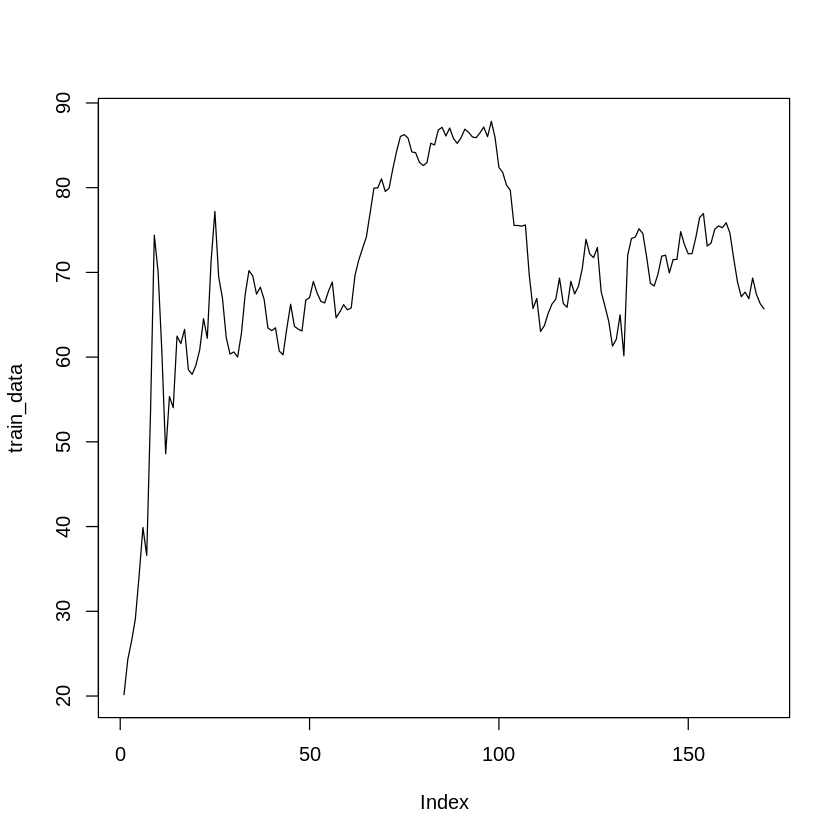

In [229]:
plot(train_data, type="l")

In [230]:
install.packages("tseries")
library(tseries)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [231]:
adf.test(train_data)


	Augmented Dickey-Fuller Test

data:  train_data
Dickey-Fuller = -3.3131, Lag order = 5, p-value = 0.07128
alternative hypothesis: stationary


The series is non-stationary from Dickey-Fuller Test

In [232]:
install.packages("TSA")
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



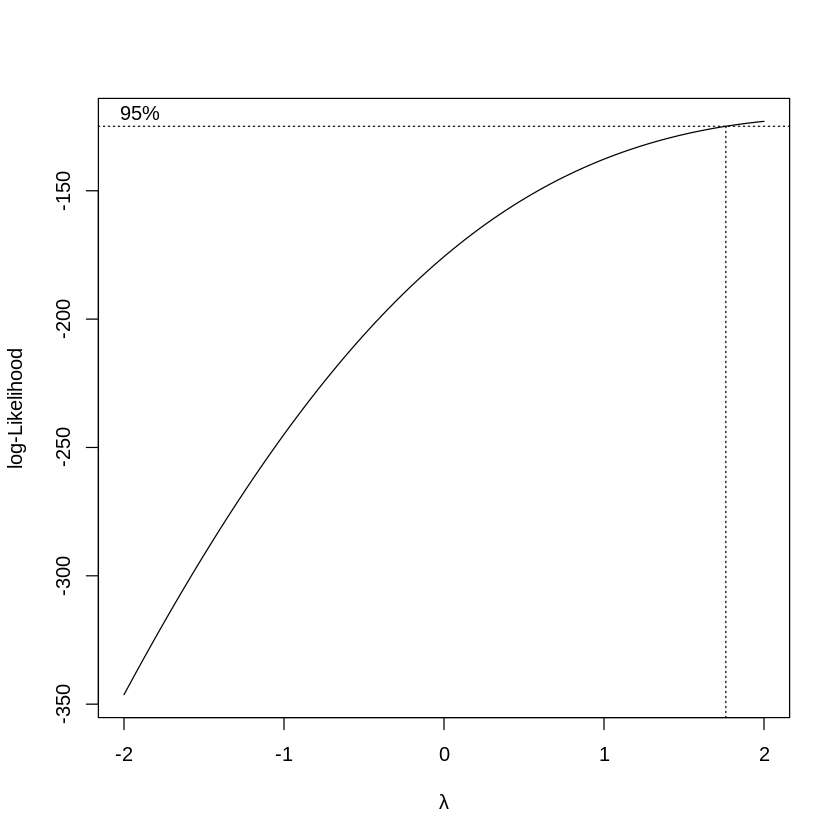

In [233]:
library(MASS)
boxcox(lm(train_data ~ 1))

We clearly see that confidence interval starts from 2, so we set lambda = 2

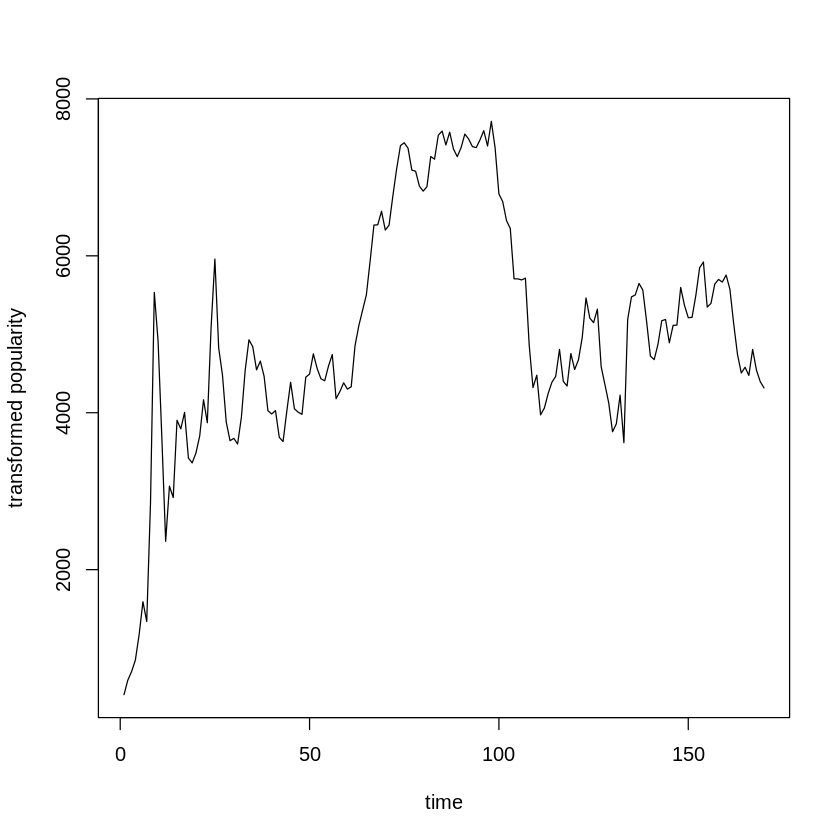

In [234]:
# Apply Box-Cox transformation with lambda = 2
lambda <- 2
transformed_ts <- train_data^lambda
plot(transformed_ts, type="l", xlab="time",ylab="transformed popularity")

### Model Specification & Diagnosis
I used three approaches:

1- Using auto.arima()

2- Using ACF and PACF

3- Using BIC and AIC

#### I- auto.arima()

In [235]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [236]:
auto.arima(transformed_ts)

Series: transformed_ts 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.1763
s.e.  0.0790

sigma^2 = 193282:  log likelihood = -1267.84
AIC=2539.68   AICc=2539.75   BIC=2545.94

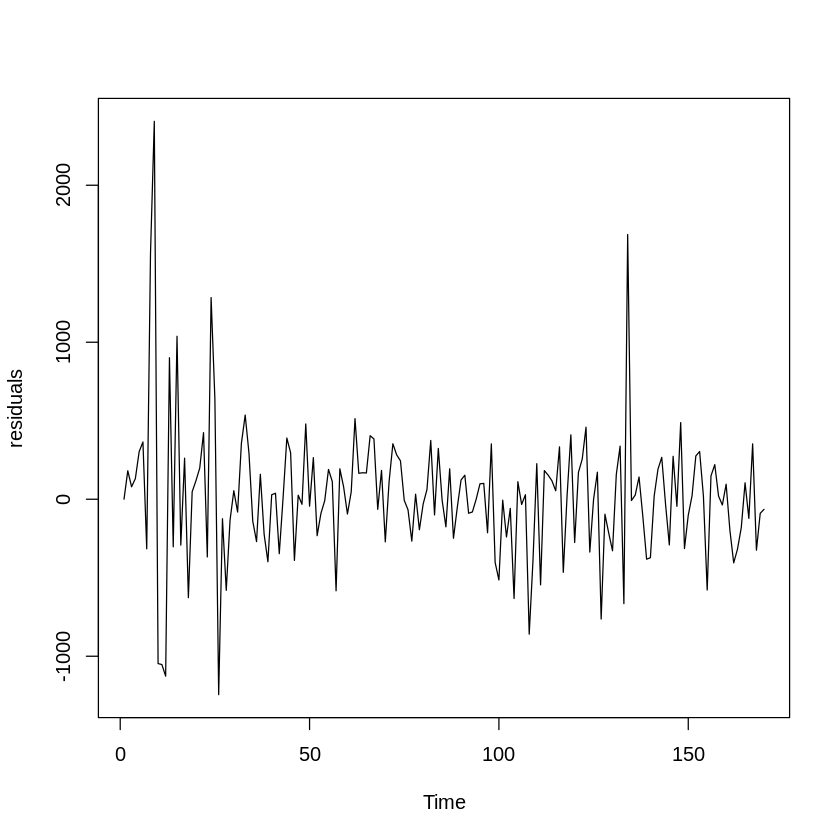

In [237]:
# Fit ARIMA(0,1,1) model
model <- arima(transformed_ts, order = c(0, 1, 1))

# Extract residuals
residuals <- resid(model)

# Plot residuals
plot(residuals)

In [238]:
summary(model)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = transformed_ts, order = c(0, 1, 1))

Coefficients:
         ma1
      0.1763
s.e.  0.0790

sigma^2 estimated as 192139:  log likelihood = -1267.84,  aic = 2537.68

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

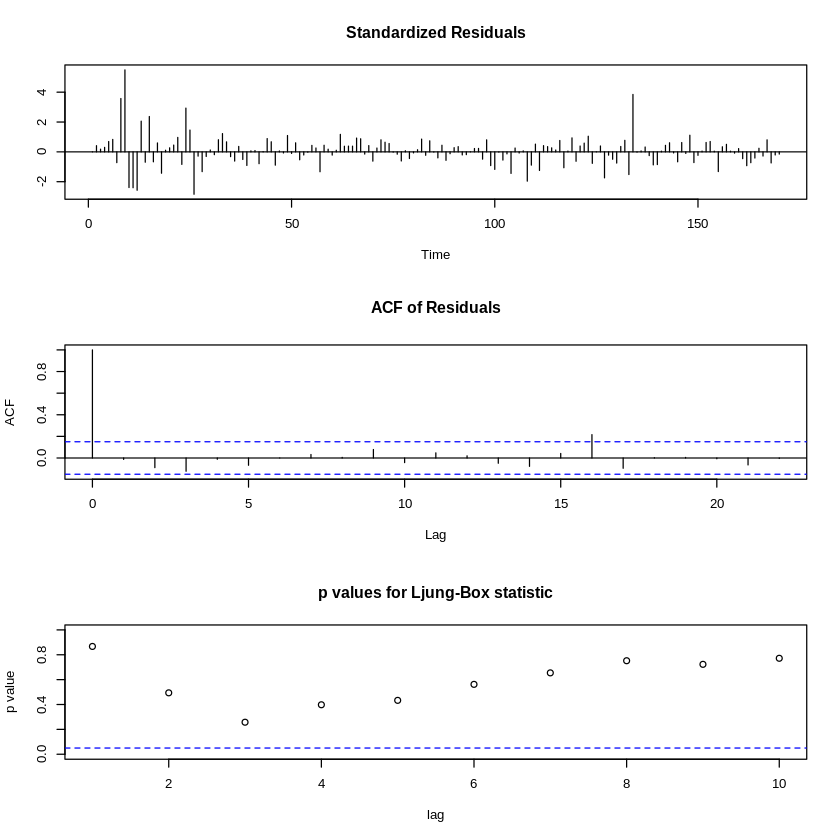

In [239]:
tsdiag(model)

The p-values for the Ljung-Box test all are well above 0.05, indicating non-significance

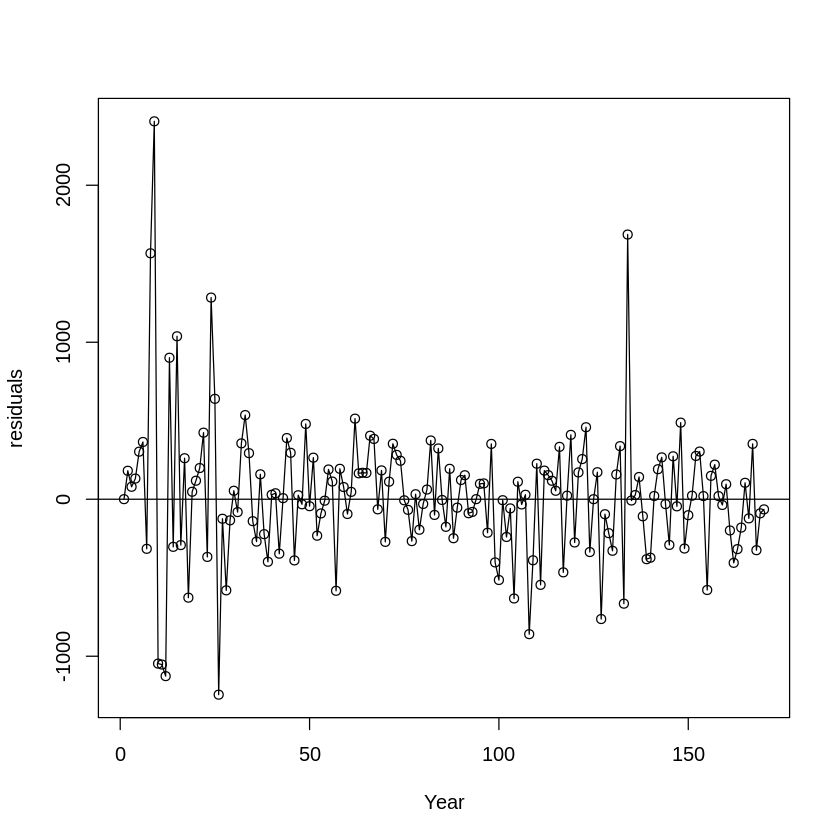

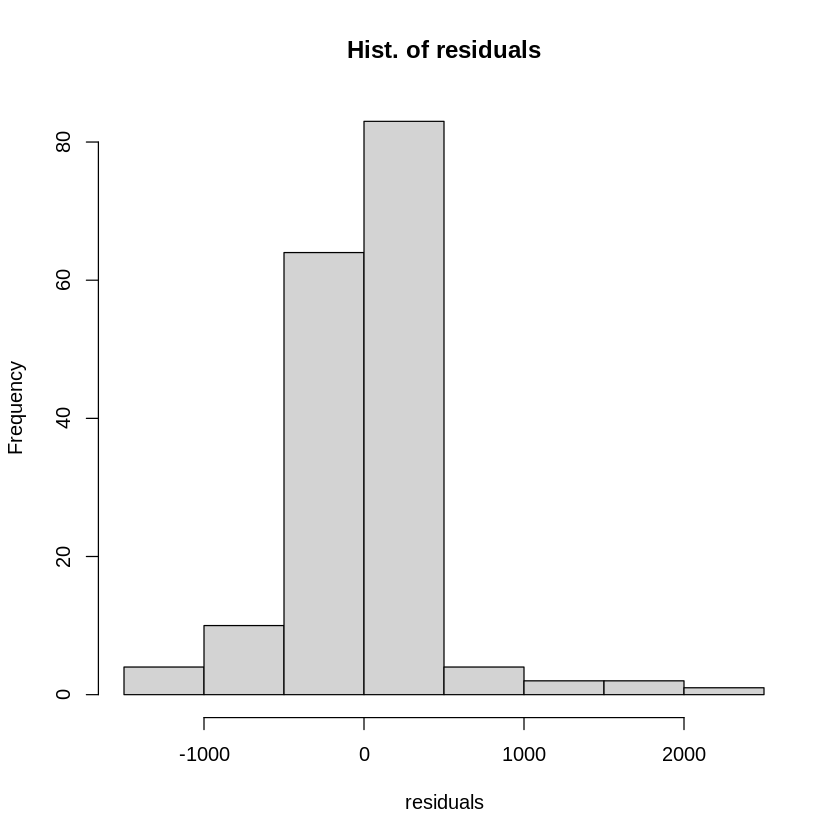


	Shapiro-Wilk normality test

data:  residuals
W = 0.88293, p-value = 2.736e-10


[1] ">>>>> runs test"


$pvalue
[1] 0.528

$observed.runs
[1] 90

$expected.runs
[1] 85.42353

$n1
[1] 78

$n2
[1] 92

$k
[1] 0

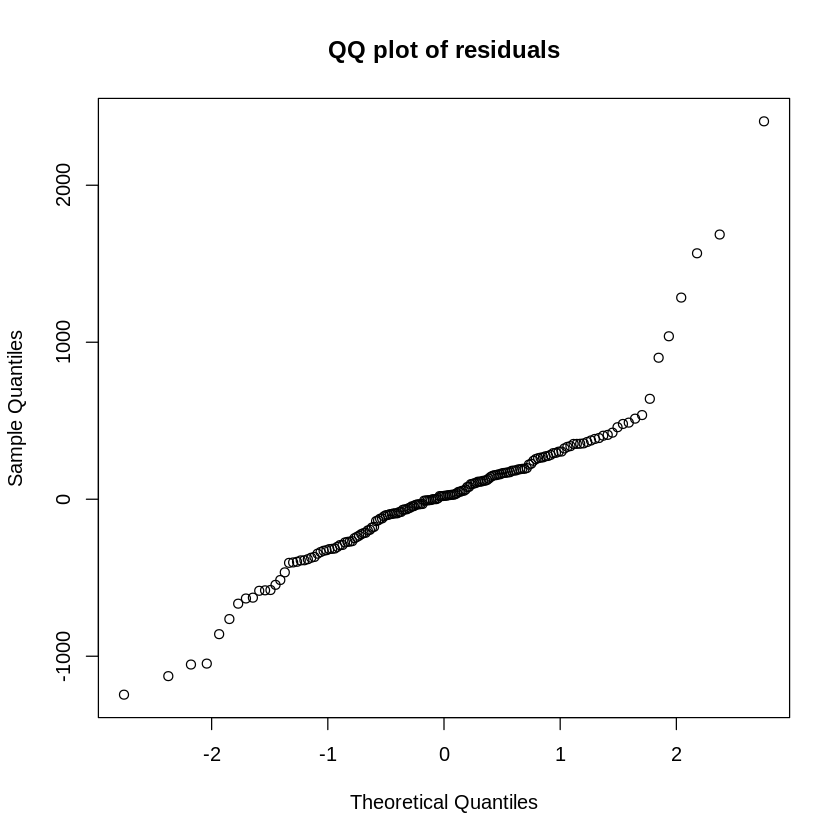

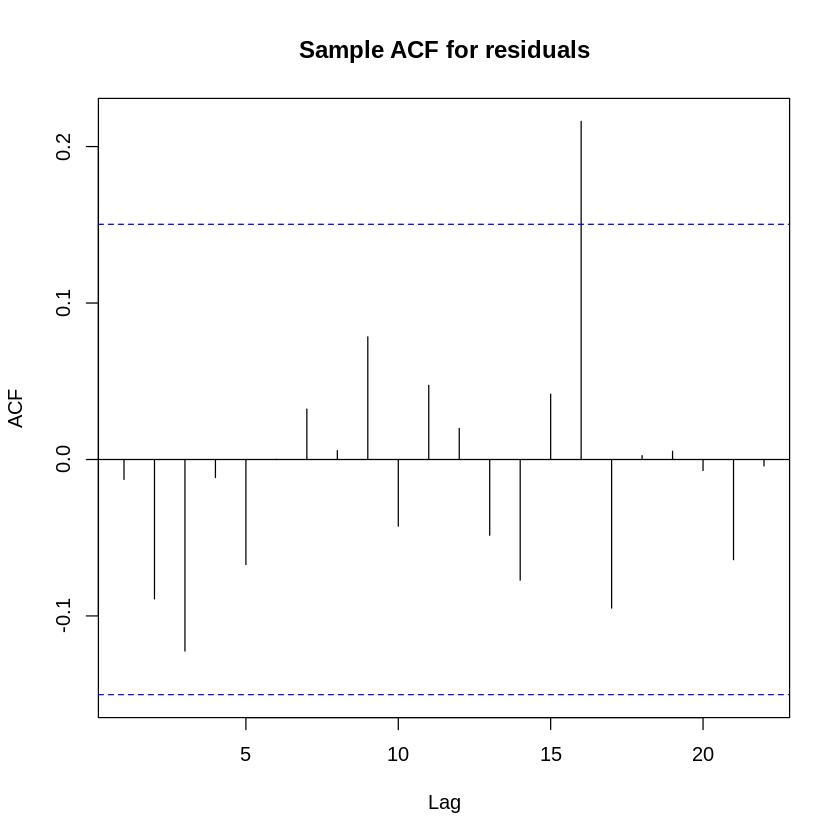

In [240]:
plot(residuals,ylab="residuals",xlab="Year",type="o")

abline(h=0)
hist(residuals,main="Hist. of residuals",xlab="residuals")

qqnorm(residuals,main="QQ plot of residuals")

shapiro.test(residuals)

print(">>>>> runs test")
runs(residuals)

acf(residuals,main="Sample ACF for residuals")

Mean is 0, Uncorrelation between residuals but the distribution is not normal (from the qq plot, shapiro test and the historgram)

#### II- ACF and PACF:

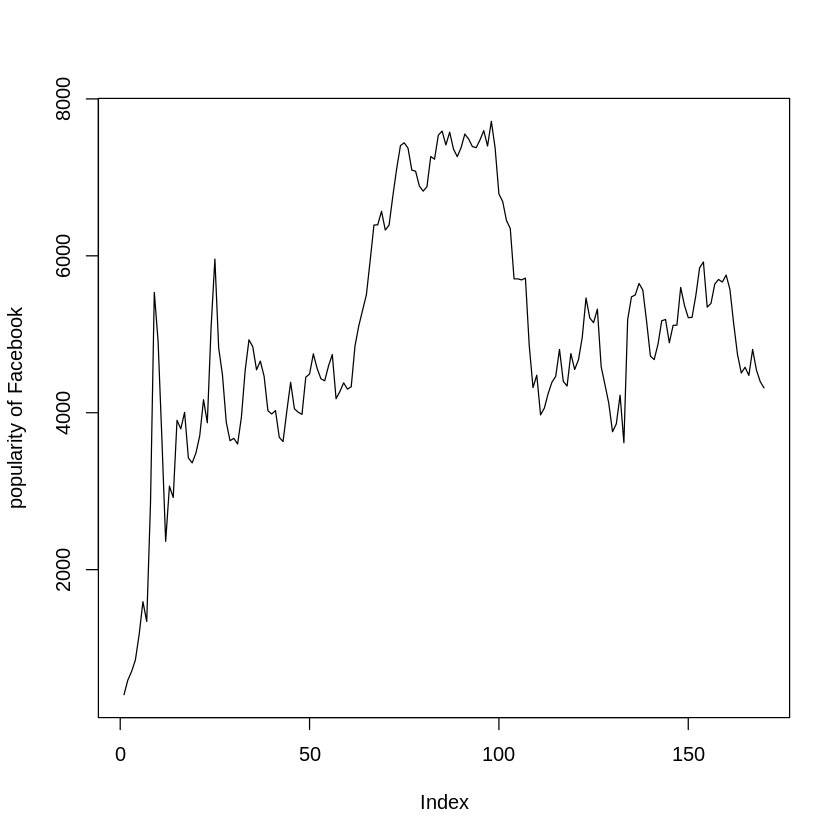

In [241]:
plot(transformed_ts, type='l', ylab='popularity of Facebook')

The data here is trendy, the influence inceases then decreses, so we need to perform differencing

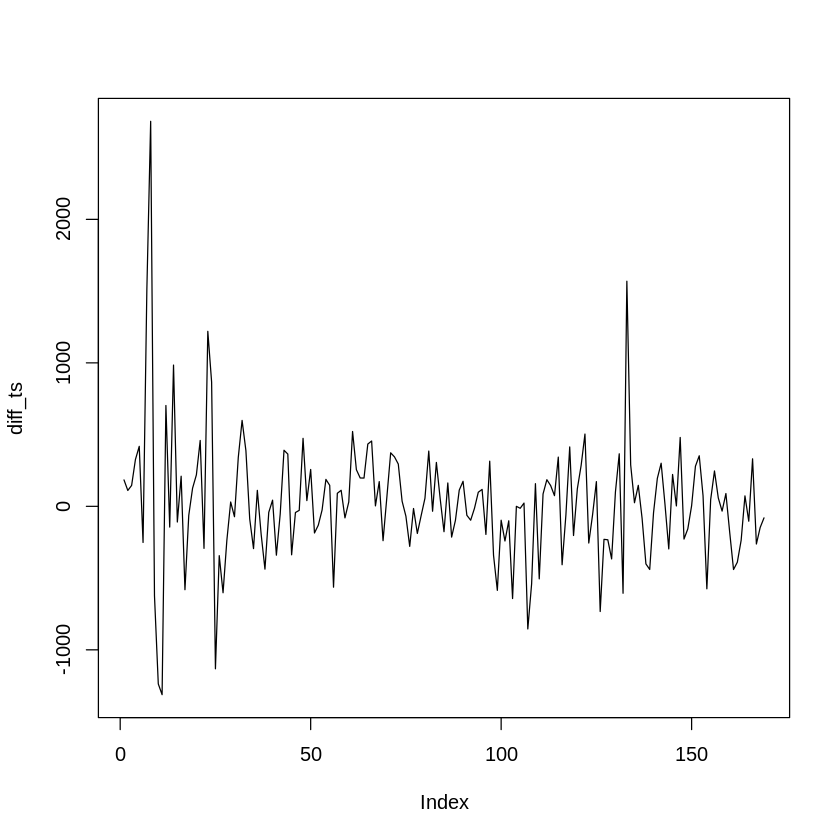

In [242]:
diff_ts <- diff(transformed_ts)
plot(diff_ts, type='l')

It clear that all trends are removed from our time series, this means that the parameter d in ARIMA is 1

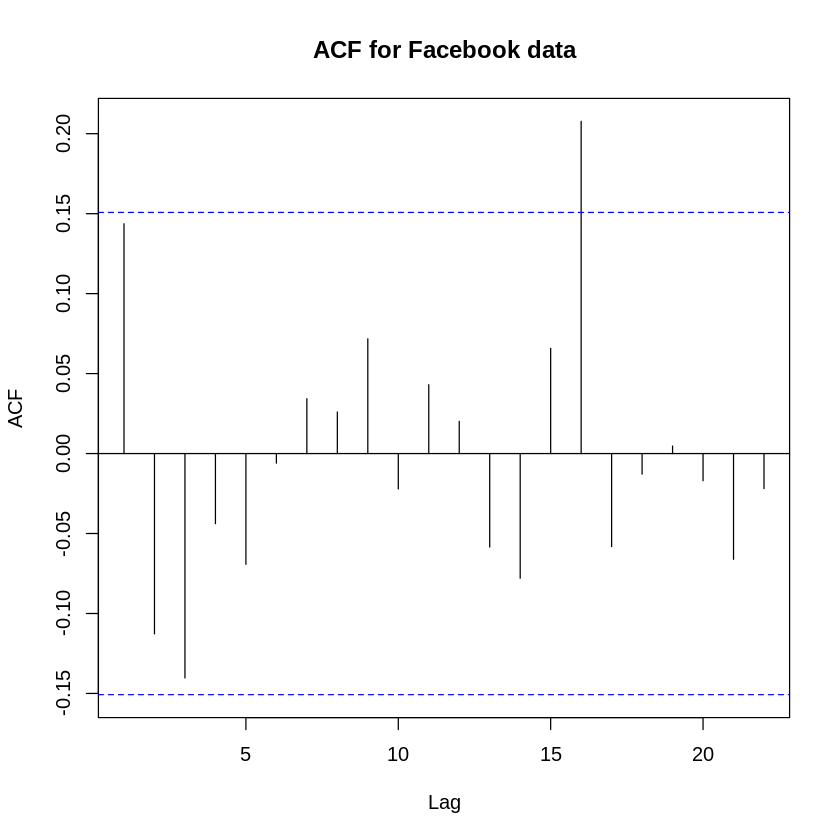

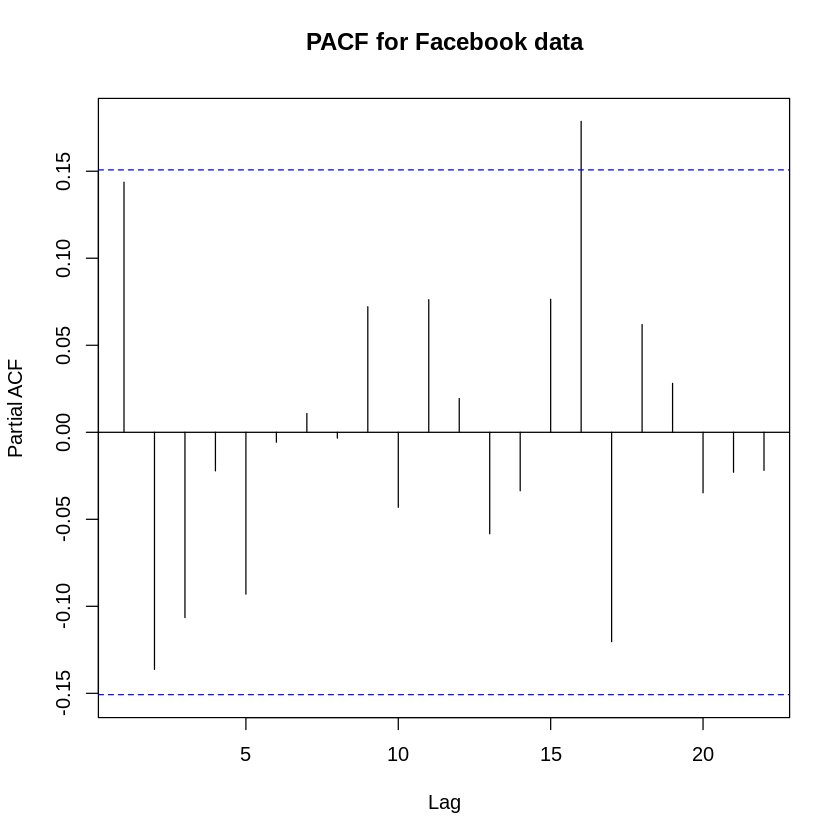

In [273]:
# Compute ACF and PACF
acf_result <- acf(diff_ts, main="ACF for Facebook data")
pacf_result <- pacf(diff_ts, main="PACF for Facebook data")


From both ACF and PACF, we deduce that p and q are both 0 because there is no correlation (except at lag 16 which we may say that it's because of noise)

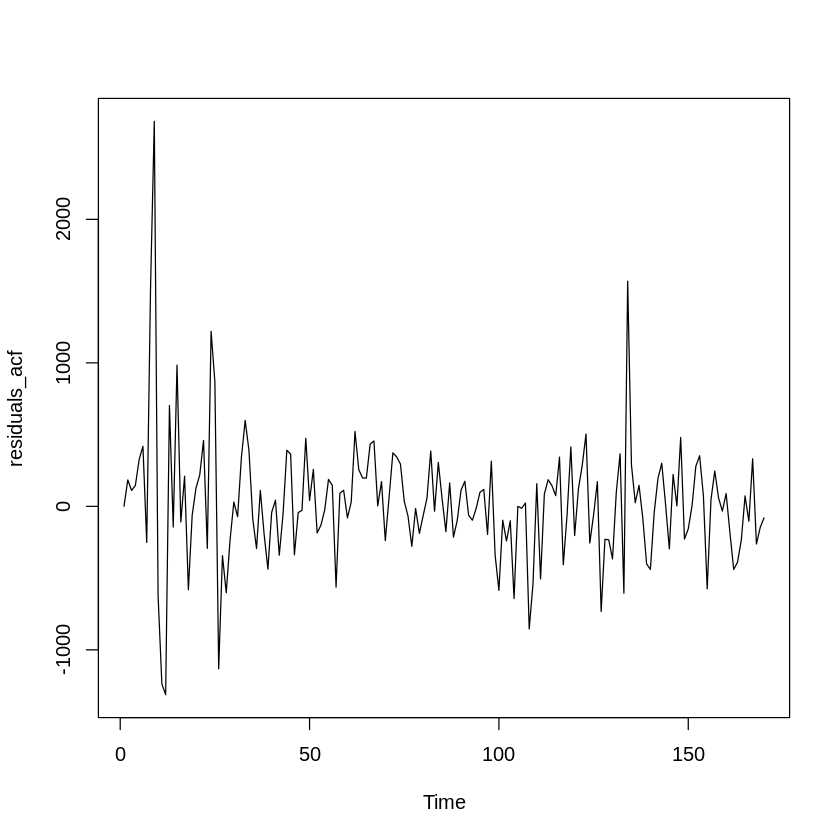

In [244]:
model_acf <- arima(transformed_ts, order = c(0, 1, 0))

# Extract residuals
residuals_acf <- resid(model_acf)

# Plot residuals
plot(residuals_acf)

In [245]:
summary(model_acf)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = transformed_ts, order = c(0, 1, 0))


sigma^2 estimated as 197393:  log likelihood = -1270.11,  aic = 2540.21

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

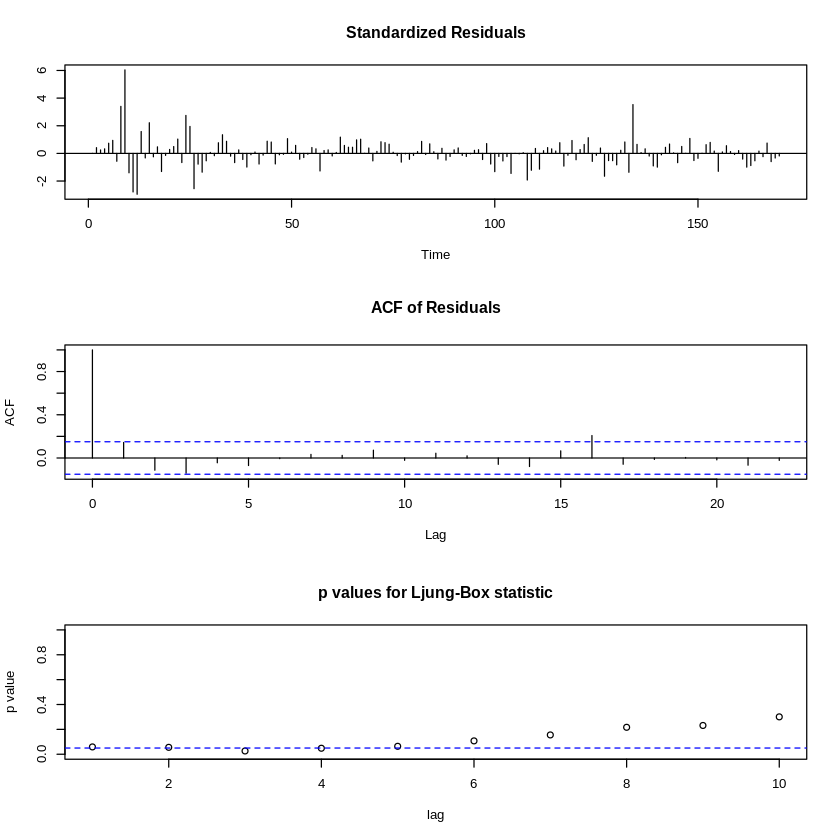

In [246]:
tsdiag(model_acf)

There are some points are below 0.05 in Ljung test, which is not good

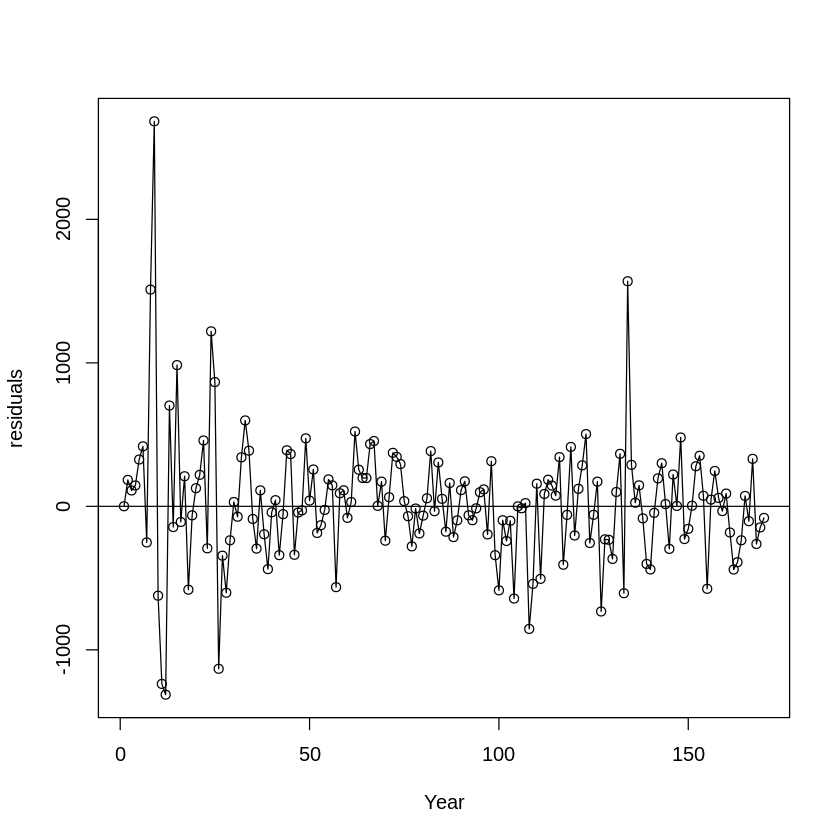

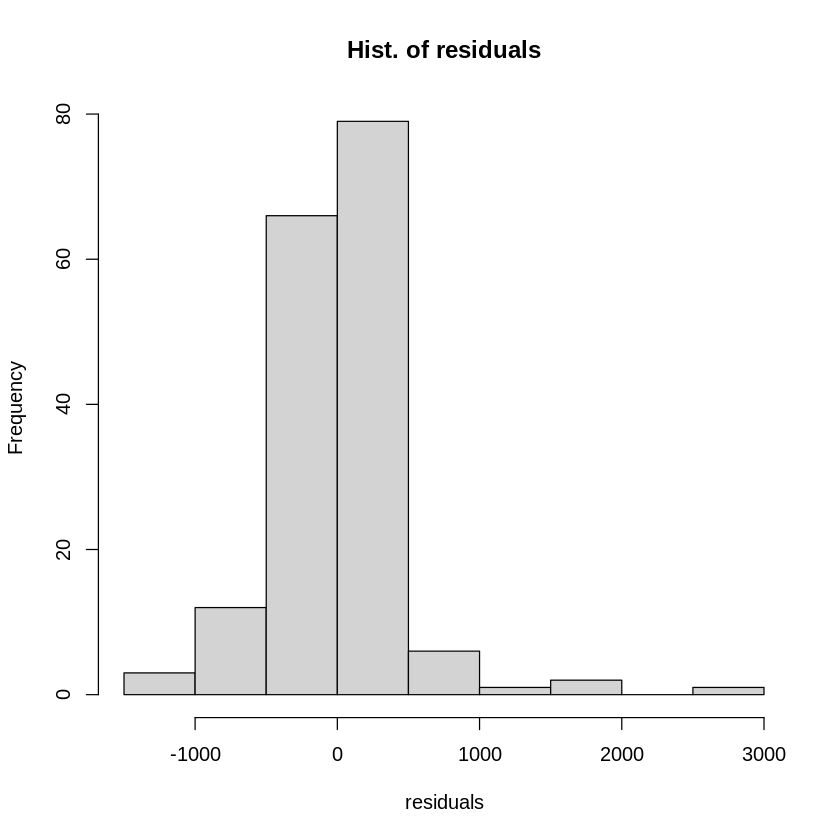


	Shapiro-Wilk normality test

data:  residuals_acf
W = 0.8772, p-value = 1.359e-10


[1] ">>>>> runs test"


$pvalue
[1] 0.151

$observed.runs
[1] 76

$expected.runs
[1] 85.81176

$n1
[1] 81

$n2
[1] 89

$k
[1] 0

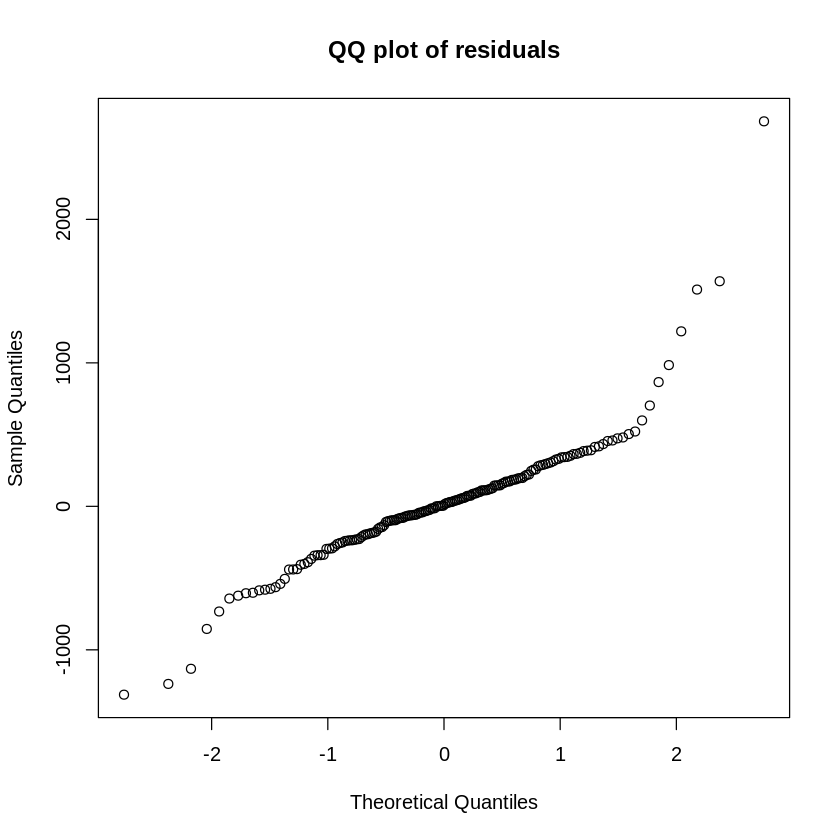

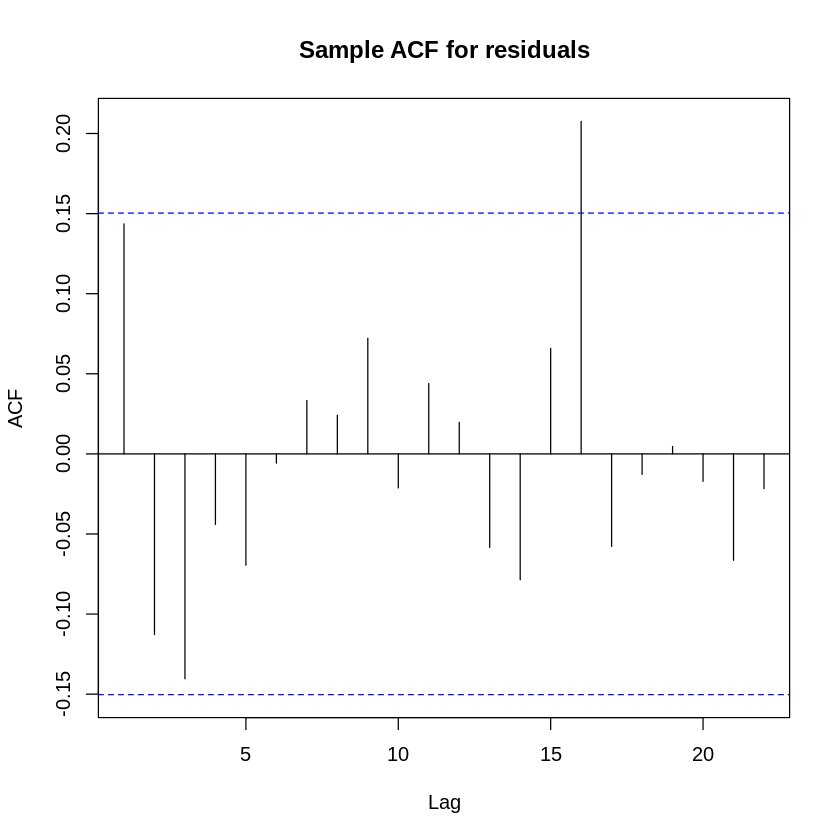

In [247]:
plot(residuals_acf,ylab="residuals",xlab="Year",type="o")

abline(h=0)
hist(residuals_acf,main="Hist. of residuals",xlab="residuals")

qqnorm(residuals_acf,main="QQ plot of residuals")

shapiro.test(residuals_acf)

print(">>>>> runs test")
runs(residuals_acf)

acf(residuals_acf,main="Sample ACF for residuals")

Here, the mean is 0, points are uncorrelated from each other (runs test confirms that), but the distribution is not normal (from the qq plot, the histogram and shapiro-wilk test)

#### III- Using AIC and BIC:

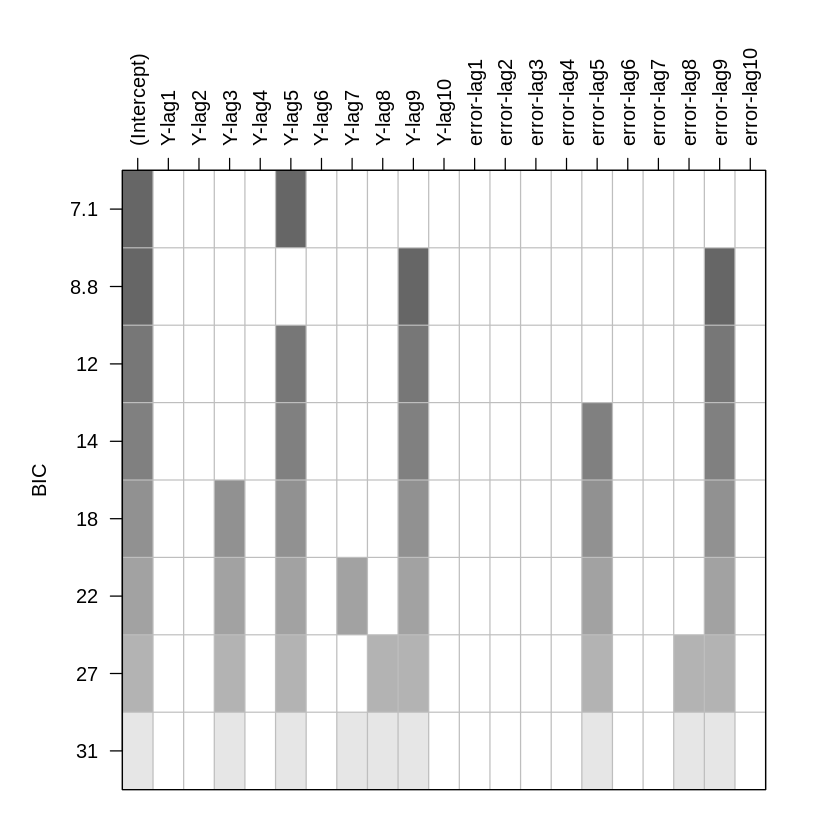

In [248]:
plot(armasubsets(diff(ts_data), 10, 10))

From the BIC and AIC plots, we can  say that the possible models are:

ARIMA(5,1,0), ARIMA(9, 1, 9)

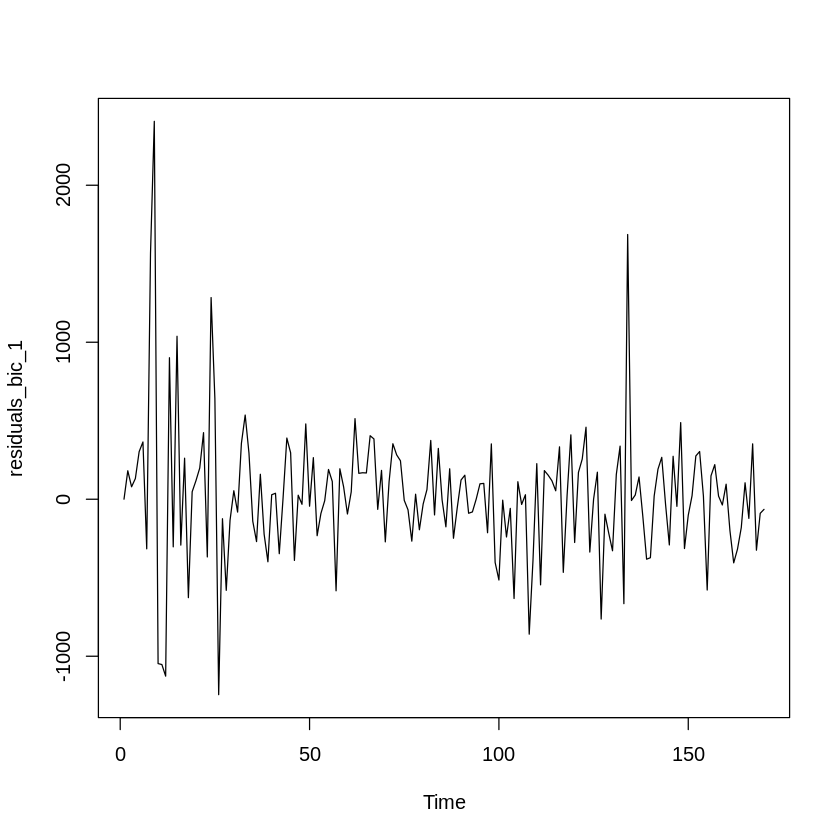

In [249]:
model_bic_1 <- arima(transformed_ts, order = c(5, 1, 0))

# Extract residuals
residuals_bic_1 <- resid(model)

# Plot residuals
plot(residuals_bic_1)

In [250]:
summary(model_bic_1)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = transformed_ts, order = c(5, 1, 0))

Coefficients:
         ar1      ar2      ar3      ar4      ar5
      0.1466  -0.1273  -0.1104  -0.0059  -0.0892
s.e.  0.0765   0.0771   0.0771   0.0770   0.0762

sigma^2 estimated as 186049:  log likelihood = -1265.17,  aic = 2540.34

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

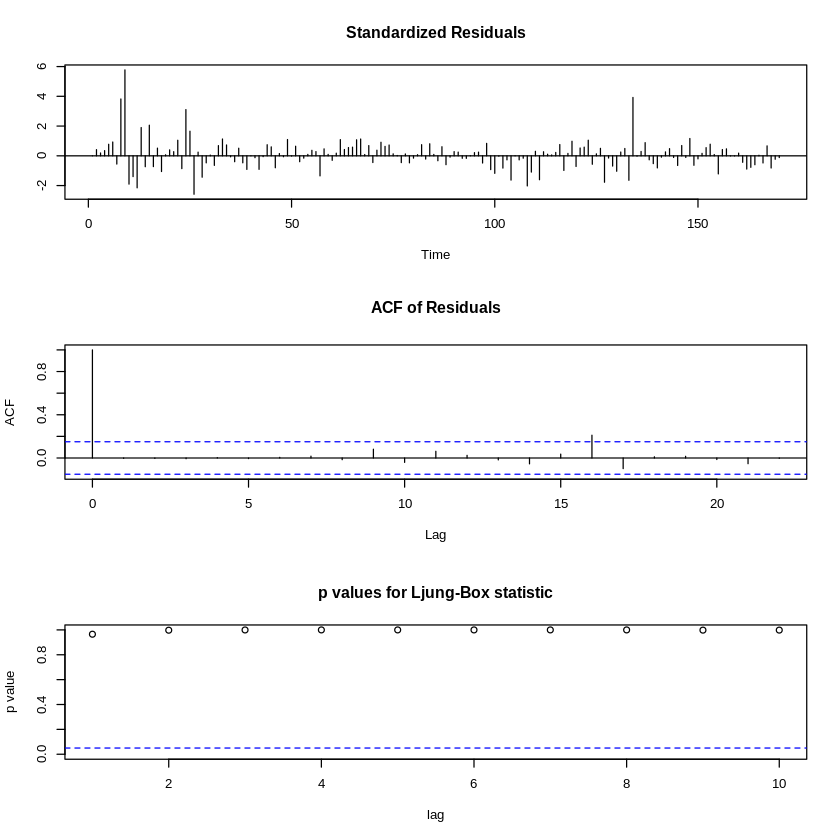

In [251]:
tsdiag(model_bic_1)

The p-values for the Ljung-Box Q test all are well above 0.05, indicating non-significance

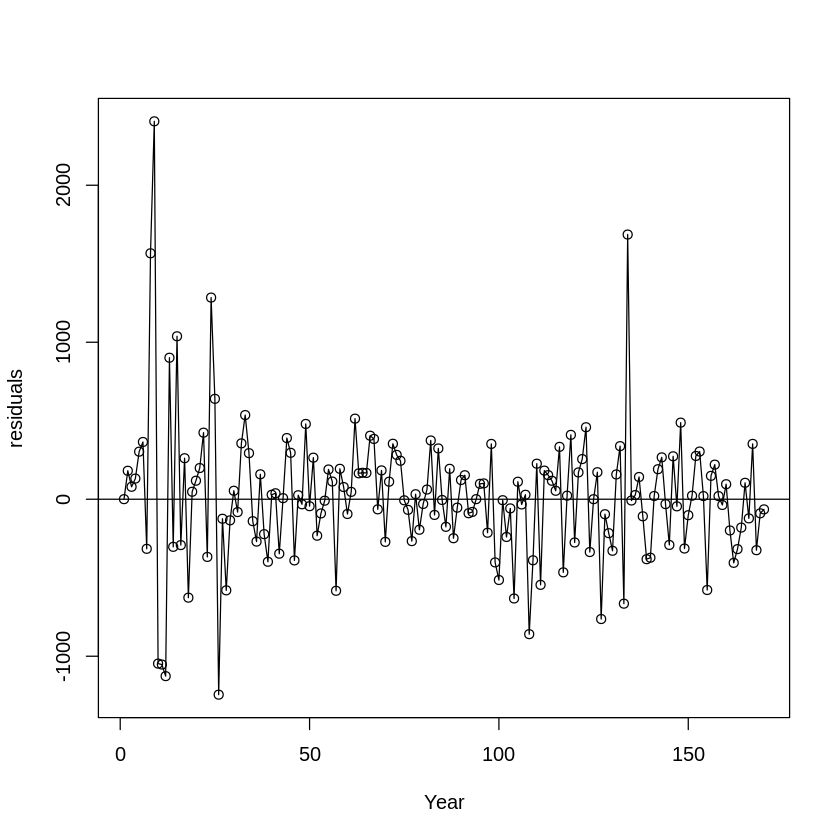

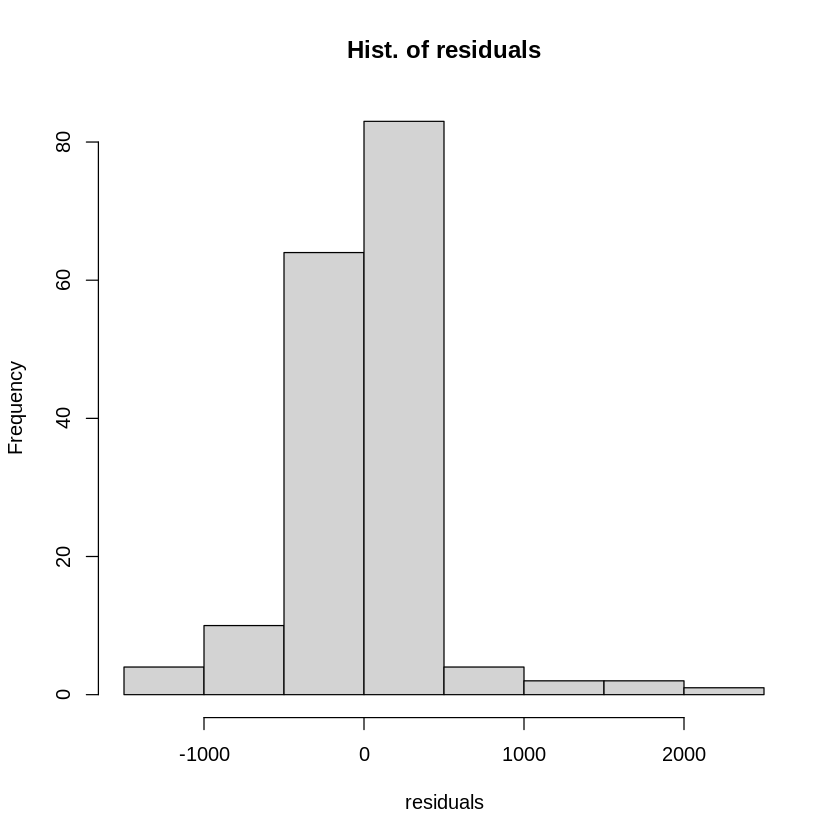


	Shapiro-Wilk normality test

data:  residuals_bic_1
W = 0.88293, p-value = 2.736e-10


[1] ">>>>> runs test"


$pvalue
[1] 0.528

$observed.runs
[1] 90

$expected.runs
[1] 85.42353

$n1
[1] 78

$n2
[1] 92

$k
[1] 0

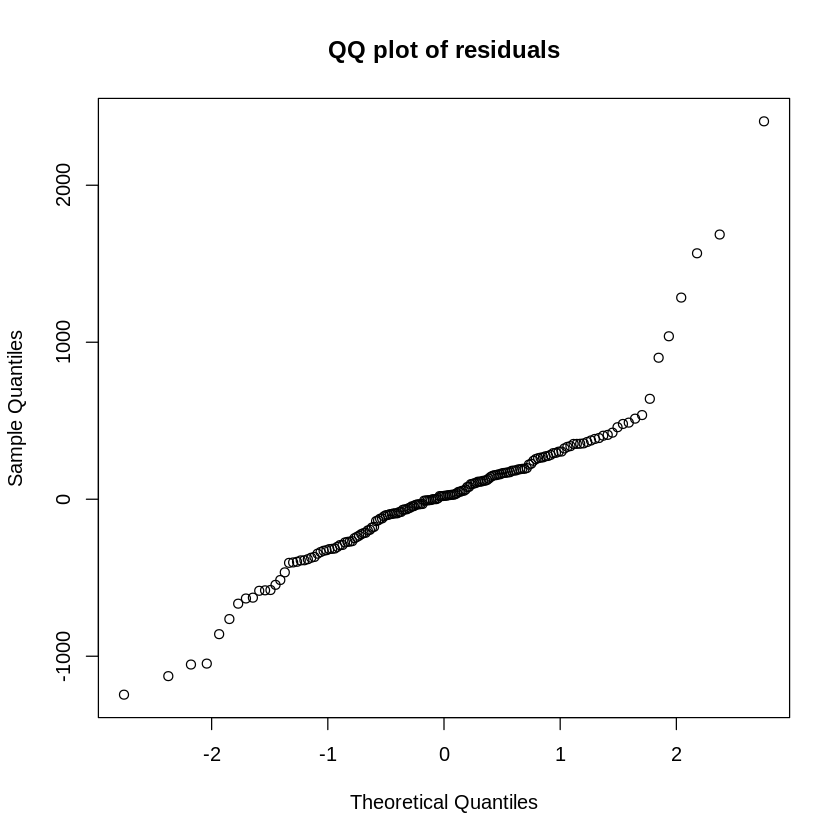

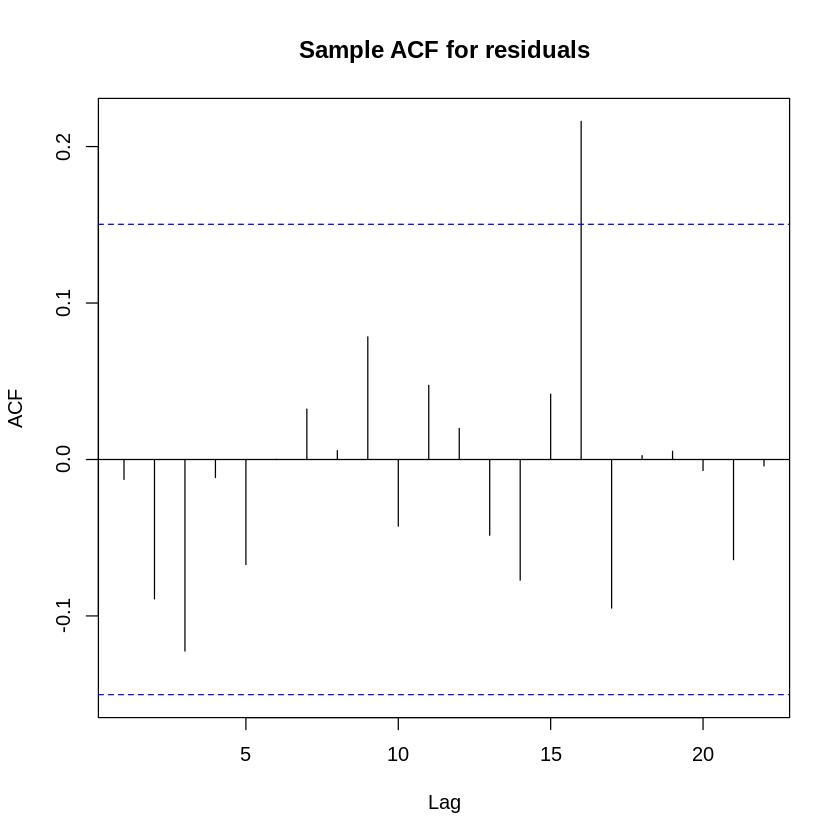

In [252]:
plot(residuals_bic_1,ylab="residuals",xlab="Year",type="o")

abline(h=0)
hist(residuals_bic_1,main="Hist. of residuals",xlab="residuals")

qqnorm(residuals_bic_1,main="QQ plot of residuals")

shapiro.test(residuals_bic_1)

print(">>>>> runs test")
runs(residuals_bic_1)

acf(residuals_bic_1,main="Sample ACF for residuals")

Mean is 0, Residuals are uncorrelated from the ACF and Runs test, the distribution is not normal from the qq plot, the shapiro test and the histogram
But this model is similar to the one give by auto.arima()

Now, we test the other model (ARIMA(9,1,9))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”


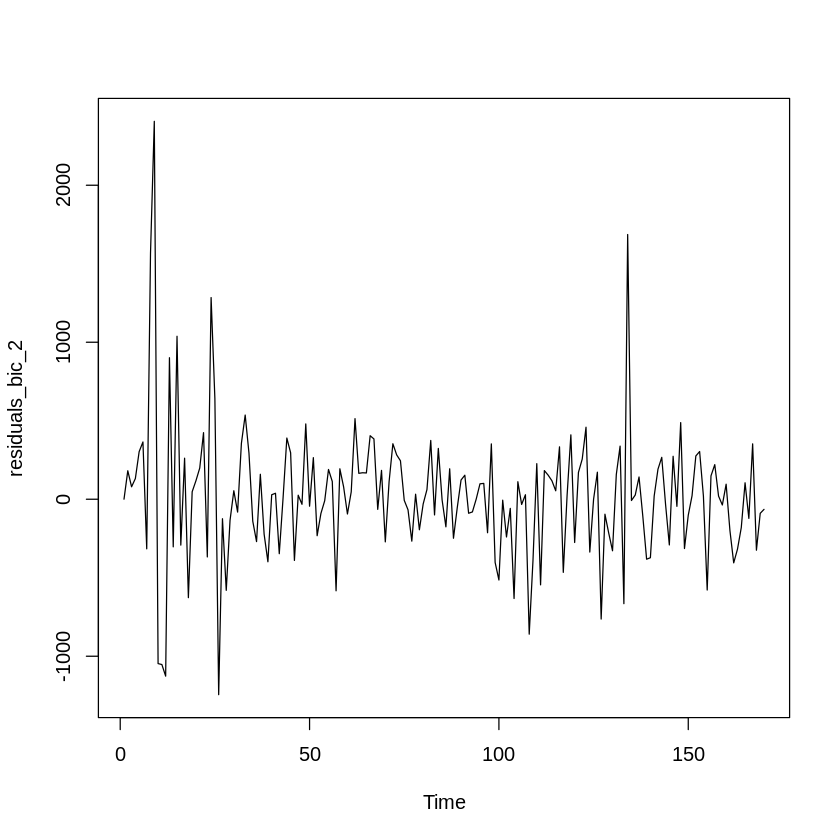

In [253]:
model_bic_2 <- arima(transformed_ts, order = c(9, 1, 9))

# Extract residuals
residuals_bic_2 <- resid(model)

# Plot residuals
plot(residuals_bic_2)

In [254]:
summary(model_bic_2)

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
arima(x = transformed_ts, order = c(9, 1, 9))

Coefficients:
         ar1     ar2      ar3      ar4      ar5     ar6     ar7      ar8
      0.1685  0.0806  -0.2270  -0.1289  -0.1748  0.3346  0.5035  -0.4288
s.e.  0.2283  0.2054   0.1254   0.1104   0.1116  0.1281  0.1234   0.1887
         ar9     ma1      ma2     ma3     ma4     ma5      ma6      ma7     ma8
      0.4041  0.0151  -0.1874  0.1198  0.1567  0.2352  -0.3338  -0.7544  0.4169
s.e.  0.1840  0.2525   0.2384  0.1577  0.1156  0.1147   0.1468   0.1445  0.2284
          ma9
      -0.0230
s.e.   0.2079

sigma^2 estimated as 156430:  log likelihood = -1256.84,  aic = 2549.68

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

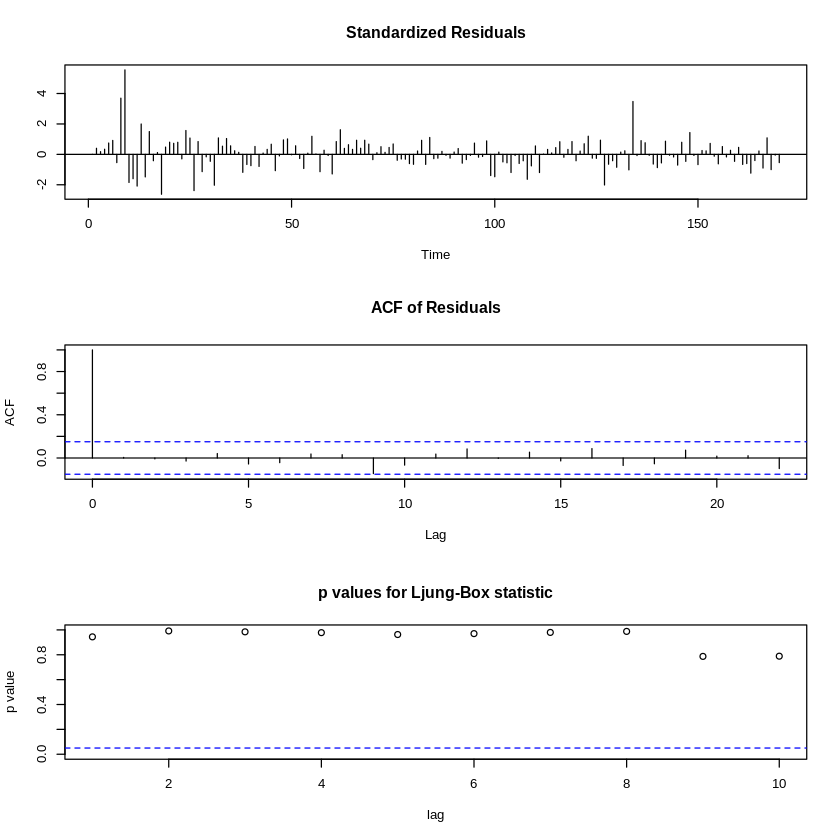

In [255]:
tsdiag(model_bic_2)

The p-values for the Ljung-Box Q test all are well above 0.05, indicating non-significance

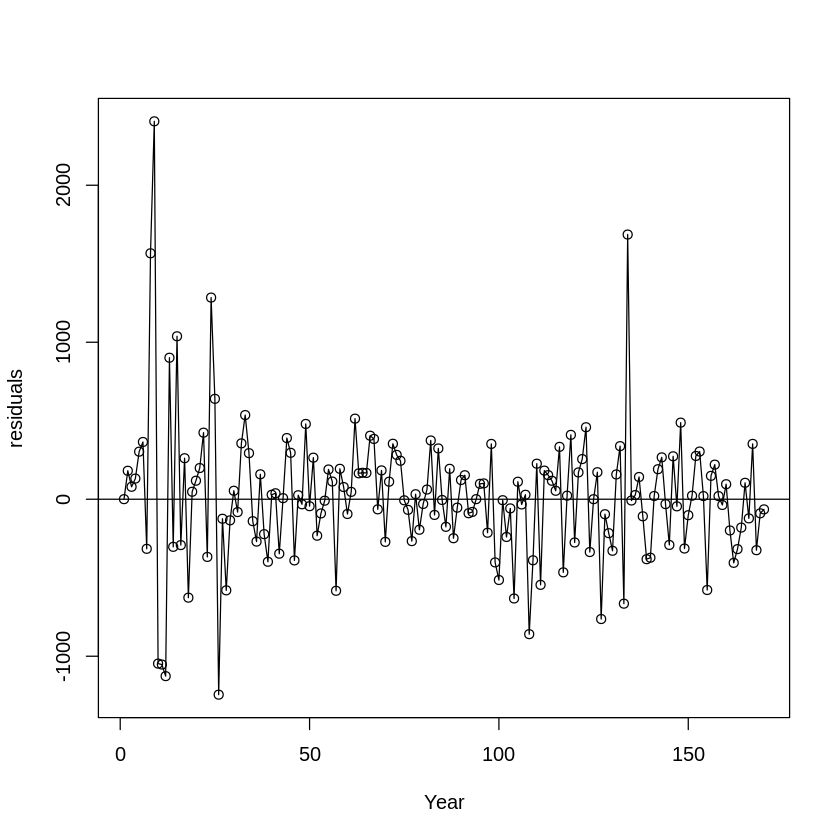

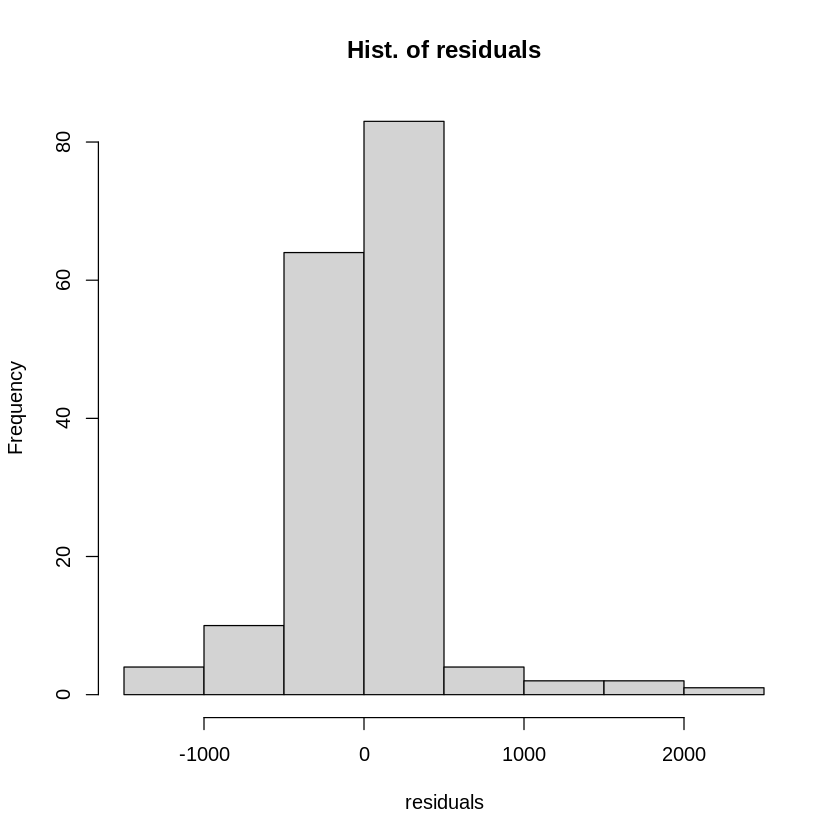


	Shapiro-Wilk normality test

data:  residuals_bic_2
W = 0.88293, p-value = 2.736e-10


[1] ">>>>> runs test"


$pvalue
[1] 0.528

$observed.runs
[1] 90

$expected.runs
[1] 85.42353

$n1
[1] 78

$n2
[1] 92

$k
[1] 0

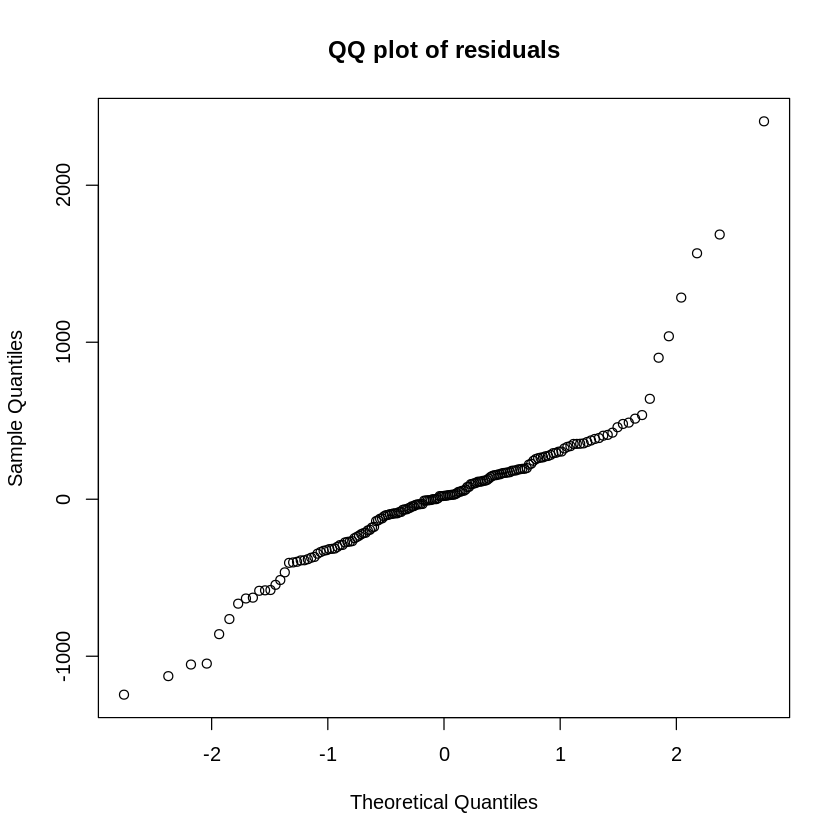

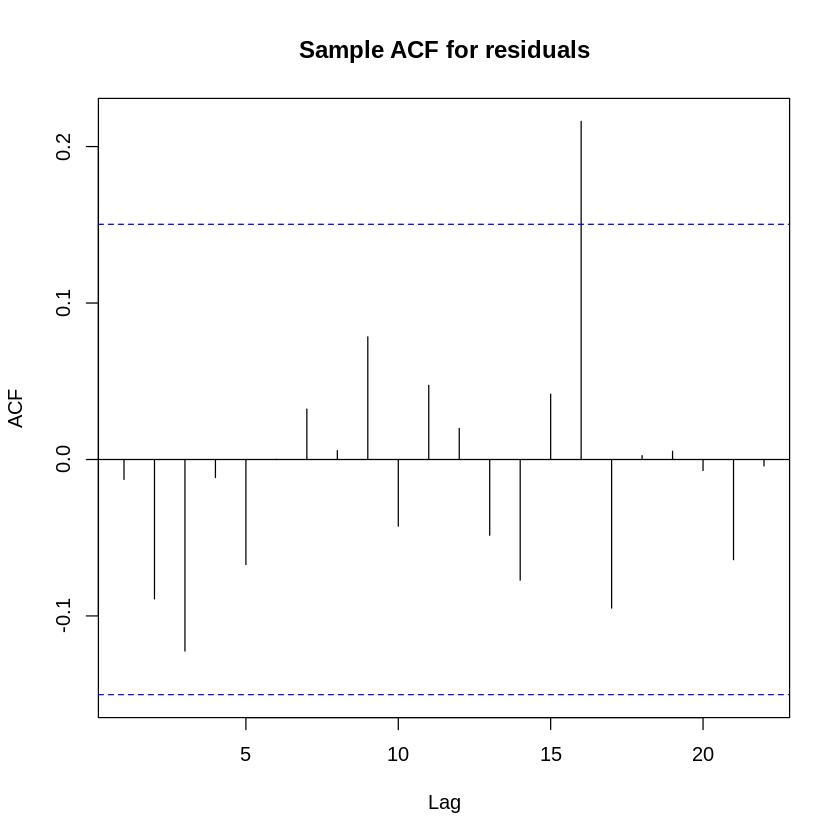

In [256]:
plot(residuals_bic_2,ylab="residuals",xlab="Year",type="o")

abline(h=0)
hist(residuals_bic_2,main="Hist. of residuals",xlab="residuals")

qqnorm(residuals_bic_2,main="QQ plot of residuals")

shapiro.test(residuals_bic_2)

print(">>>>> runs test")
runs(residuals_bic_2)

acf(residuals_bic_2,main="Sample ACF for residuals")

Same results as the previous model (convergence)

### Forecasting:


#### 1- Using ARIMA(5,1,0)

In [257]:
arima_model <- Arima(train_data, order = c(5, 1, 0))

# 3. Forecast
forecast_values <- forecast(arima_model, h = length(test_data))

print(forecast_values)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
171       65.99069 61.48043 70.50095 59.09284 72.88854
172       66.04658 59.07824 73.01492 55.38942 76.70374
173       66.16543 57.58107 74.74980 53.03678 79.29409
174       66.19440 56.53978 75.84901 51.42894 80.95985
175       66.22020 55.62674 76.81366 50.01890 82.42150
176       66.19596 54.79163 77.60029 48.75454 83.63738
177       66.18592 54.02657 78.34528 47.58979 84.78205


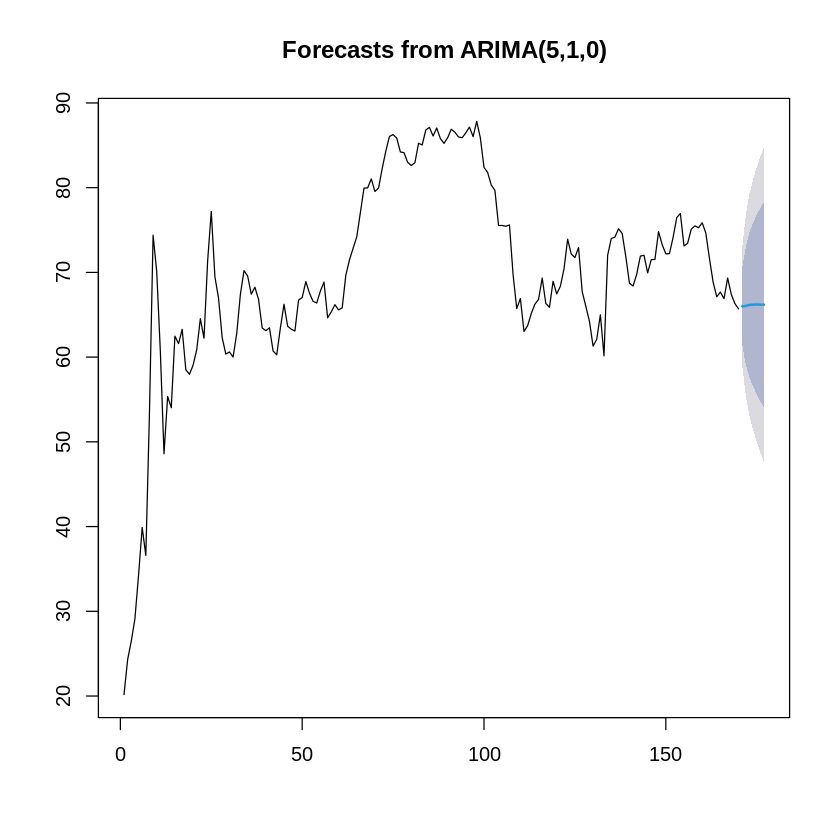

In [258]:
plot(forecast_values)

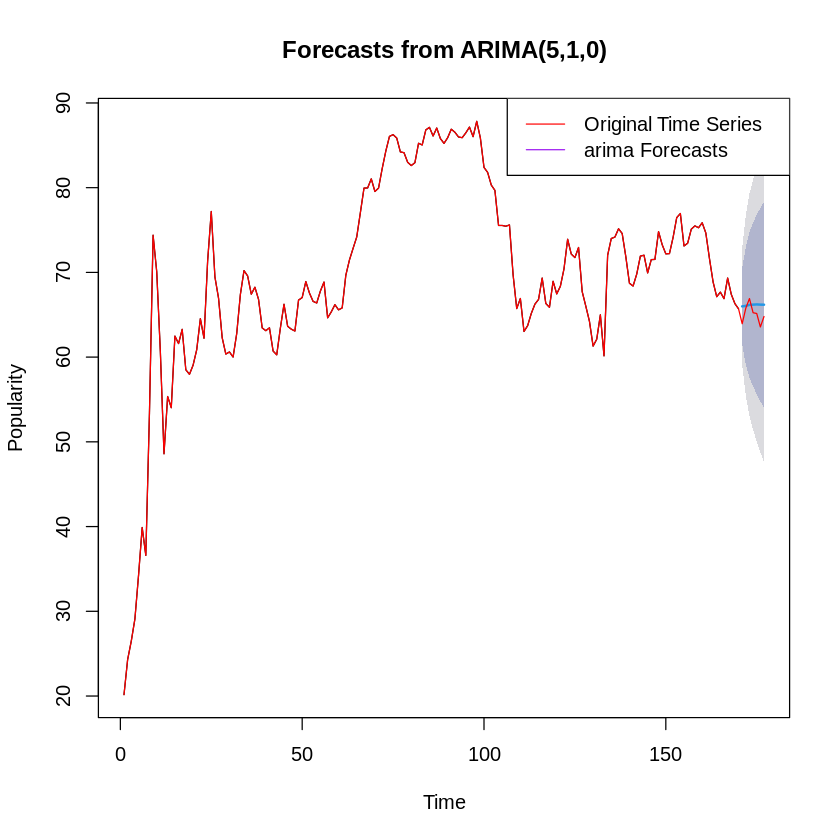

In [259]:
# plotting the original time series and the forecasts
plot(forecast_values,
     type ='l', xlab='Time', ylab ='Popularity')
lines(ts(ts_data), col = "red")
legend("topright", legend=c('Original Time Series', 'arima Forecasts'), col=c('red', 'purple'), lty=1)

In [260]:
# Calculate accuracy metrics
accuracy_metrics <- accuracy(forecast_values, test_data)

print(accuracy_metrics)

                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set  0.2844195 3.456711 2.189198  0.5337545 3.465975 0.9767015
Test set     -1.0898827 1.501611 1.302617 -1.7009974 2.018938 0.5811569
                     ACF1
Training set -0.005444318
Test set               NA


 #### 2- Using ARIMA(0,1,0)

In [261]:
arima_model <- Arima(train_data, order = c(0, 1, 0))

# 3. Forecast
forecast_values <- forecast(arima_model, h = length(test_data))

print(forecast_values)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
171           65.7 61.13608 70.26392 58.72008 72.67992
172           65.7 59.24564 72.15436 55.82890 75.57110
173           65.7 57.79505 73.60495 53.61043 77.78957
174           65.7 56.57215 74.82785 51.74016 79.65984
175           65.7 55.49476 75.90524 50.09243 81.30757
176           65.7 54.52072 76.87928 48.60276 82.79724
177           65.7 53.62499 77.77501 47.23287 84.16713


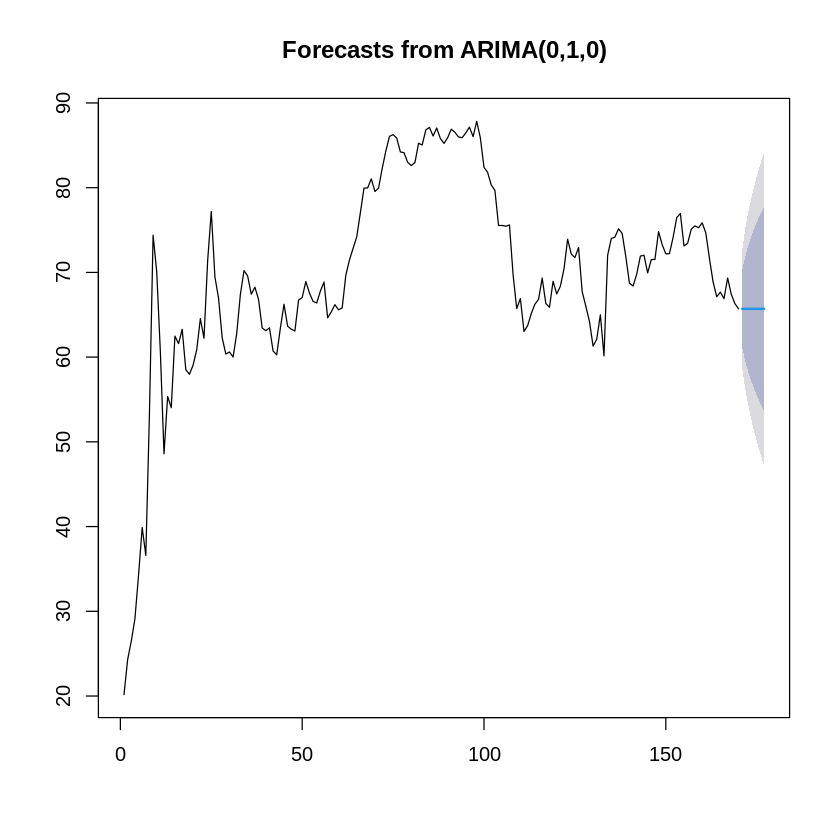

In [262]:
plot(forecast_values)

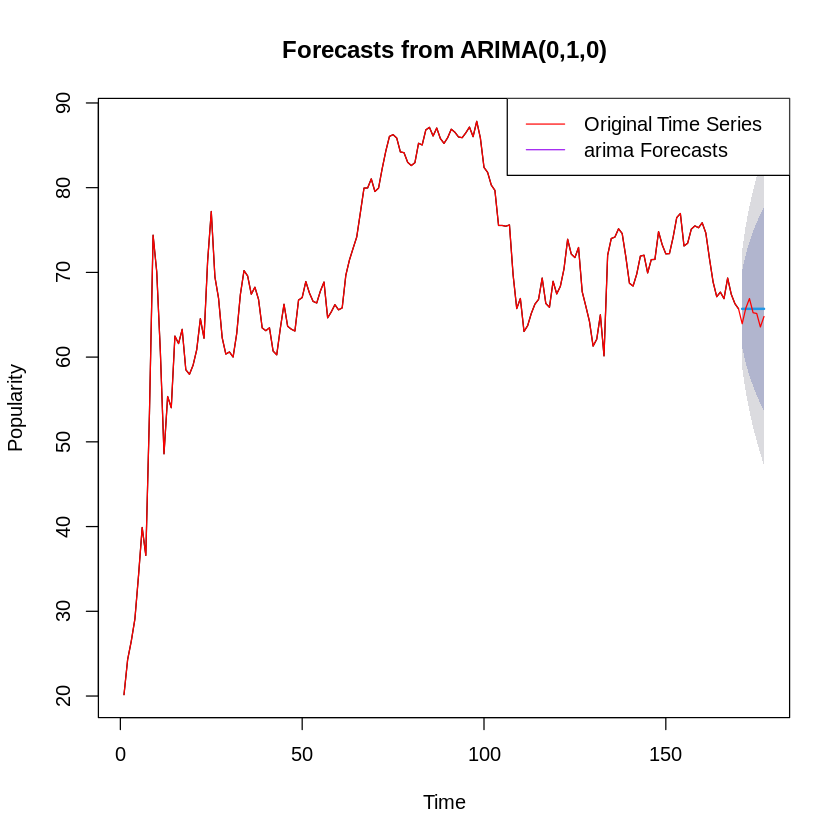

In [263]:
# plotting the original time series and the forecasts
plot(forecast_values,
     type ='l', xlab='Time', ylab ='Popularity')
lines(ts(ts_data), col = "red")
legend("topright", legend=c('Original Time Series', 'arima Forecasts'), col=c('red', 'purple'), lty=1)

In [264]:
# Calculate accuracy metrics
accuracy_metrics <- accuracy(forecast_values, test_data)

# Print the MSE
print(accuracy_metrics)

                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set  0.2680009 3.550759 2.228354  0.5058946 3.537462 0.9941706
Test set     -0.6471429 1.224156 1.015714 -1.0204705 1.571904 0.4531566
                  ACF1
Training set 0.1636062
Test set            NA


#### 3- Using ARIMA(9,1,9)

In [265]:
arima_model <- Arima(train_data, order = c(9, 1, 9))

# 3. Forecast
forecast_values <- forecast(arima_model, h = length(test_data))

print(forecast_values)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
171       64.63542 60.20036 69.07049 57.85258 71.41827
172       64.58346 57.76110 71.40581 54.14956 75.01735
173       63.98622 55.62780 72.34464 51.20312 76.76932
174       62.90076 53.58056 72.22096 48.64675 77.15478
175       62.71788 52.55278 72.88299 47.17169 78.26407
176       62.68396 51.79384 73.57408 46.02896 79.33896
177       61.07455 49.53326 72.61585 43.42366 78.72544


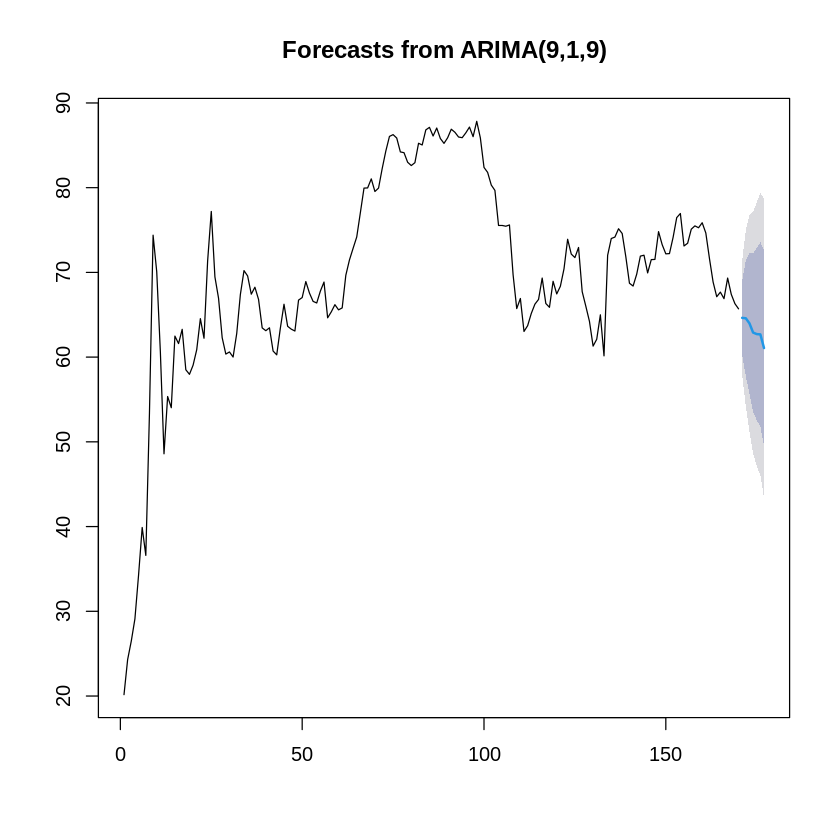

In [266]:
plot(forecast_values)

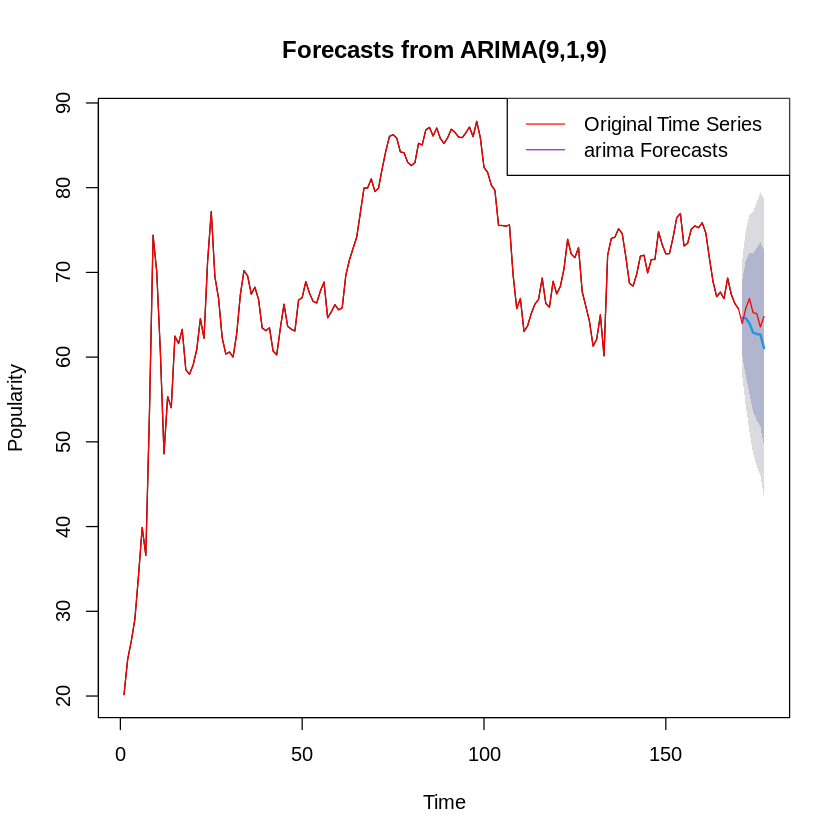

In [267]:
# plotting the original time series and the forecasts
plot(forecast_values,
     type ='l', xlab='Time', ylab ='Popularity')
lines(ts(ts_data), col = "red")
legend("topright", legend=c('Original Time Series', 'arima Forecasts'), col=c('red', 'purple'), lty=1)

In [268]:
# Calculate accuracy metrics
accuracy_metrics <- accuracy(forecast_values, test_data)

# Print the MSE
print(accuracy_metrics)

                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.04147855 3.238632 2.147196 0.1516983 3.389898 0.9579621
Test set     1.82682022 2.281072 2.025512 2.7903842 3.101132 0.9036736
                     ACF1
Training set -0.002298563
Test set               NA


#### 4- Using ARIMA(0,1,1)

In [269]:
arima_model <- Arima(train_data, order = c(0, 1, 1))

# 3. Forecast
forecast_values <- forecast(arima_model, h = length(test_data))

print(forecast_values)

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
171       65.60626 61.10598 70.10654 58.72367 72.48884
172       65.60626 58.60391 72.60860 54.89709 76.31542
173       65.60626 56.78508 74.42743 52.11543 79.09708
174       65.60626 55.28184 75.93067 49.81643 81.39608
175       65.60626 53.97123 77.24128 47.81202 83.40049
176       65.60626 52.79399 78.41852 46.01159 85.20093
177       65.60626 51.71617 79.49634 44.36320 86.84931


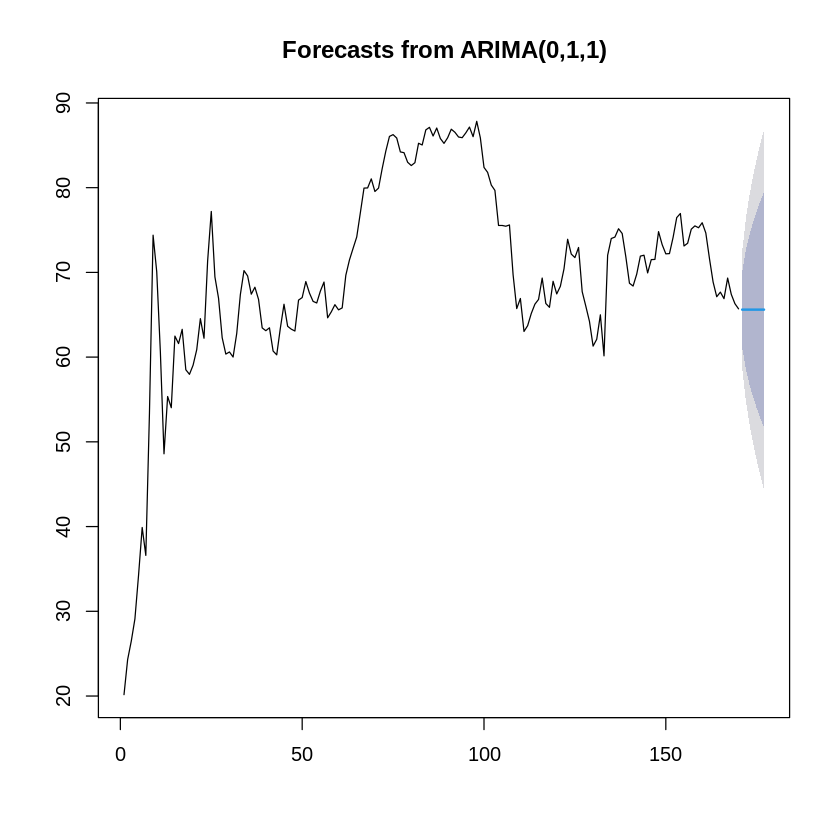

In [270]:
plot(forecast_values)

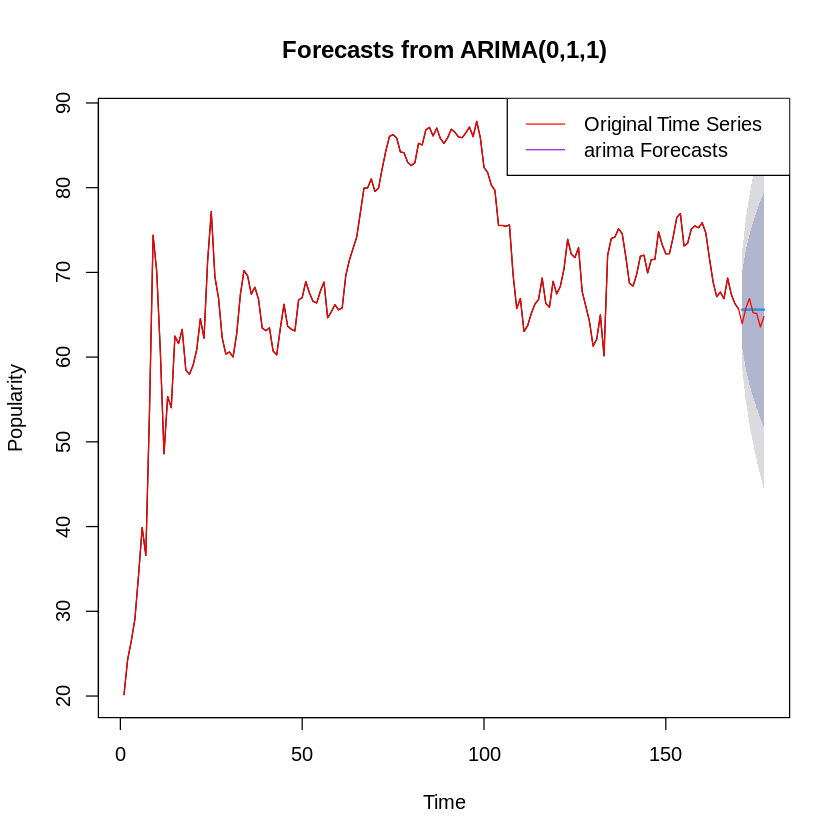

In [271]:
# plotting the original time series and the forecasts
plot(forecast_values,
     type ='l', xlab='Time', ylab ='Popularity')
lines(ts(ts_data), col = "red")
legend("topright", legend=c('Original Time Series', 'arima Forecasts'), col=c('red', 'purple'), lty=1)

In [272]:
# Calculate accuracy metrics
accuracy_metrics <- accuracy(forecast_values, test_data)

# Print the MSE
print(accuracy_metrics)

                     ME     RMSE       MAE        MPE     MAPE      MASE
Training set  0.2240714 3.490870 2.2115759  0.4322336 3.506091 0.9866851
Test set     -0.5533991 1.177291 0.9755384 -0.8763298 1.508510 0.4352323
                    ACF1
Training set -0.01084777
Test set              NA


We can see that in terms of test RMSE, ARIMA(0,1,1) is the best one among those models

But in terms of both train and test RMSE, ARIMA(9,1,9) is better because it's far from overfitting unlike the other models

### Discussion

As a conclusion, we can see from our predicition using different ARIMA models that Facebook will remain as the most popular social media.

Also this analysis helped in selecting differet candidate model to be used for prediction, espicially ARIMA(0,1,1) which is the best on test and ARIMA(9,1,9) which the best globally (not overfitting)

The model diagnosis highlighted that ARIMA(0,1,0) is the worst among all models(shapiro, runs and ljung tests)

Some of the problems I encountered:

- Enhancing Forecasting results and plots

- Normal distribution of residuals